# imports and constants

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# initial conditions

In [29]:
#semi major axis
sma_sun = 0
sma_mercury = 0.39
sma_venus = 0.723
sma_earth = 1
sma_mars = 1.524
sma_jupiter = 5.2038
sma_saturn = 9.537

#masses
m_sun = 1 #mass of the sun in solar masses (or in kg if you want to be wrong)
m_mercury = 1.652e-7
m_venus = 2.447e-6
m_earth = 3.003e-6
m_mars = 3.213e-7
m_jupiter = 9.546e-4
m_saturn = 2.857e-4

#jank
G = 4 * np.pi**2 #gravitational constant
t = 20 #total time
dt = 0.00273790926 #time step
N = int(t/dt)

In [31]:
#each planet starts at perihelion (super realistic me thinks)
sun_pos = np.array([0.0, 0.0])
mercury_pos = np.array([0.307, 0.0])
venus_pos = np.array([0.718, 0.0])
earth_pos = np.array([0.9832899, 0.0])
mars_pos = np.array([1.38, 0.0])
jupiter_pos = np.array([4.95, 0.0])
saturn_pos = np.array([9.0412, 0.0])
neptune_pos = np.array([30.07, 0.0])

In [51]:
names = ['sun', 'mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn']
colors = ['gold', 'indigo', 'brown', 'blue', 'red', 'moccasin', 'green']

pos = np.vstack([sun_pos, mercury_pos, venus_pos, earth_pos, mars_pos, jupiter_pos, saturn_pos])
mass = np.array([m_sun, m_mercury, m_venus, m_earth, m_mars, m_jupiter, m_saturn])
vel = np.zeros_like(pos)
sma = np.array([sma_sun, sma_mercury, sma_venus, sma_earth, sma_mars, sma_jupiter, sma_saturn])
P = pos.shape[0]

In [53]:
r_mag = np.linalg.norm(pos,axis=1)
v_mag = np.sqrt(G * ( (2 / r_mag) - (1 / sma) ))
v_mag[0] = 0.0

perp = np.column_stack([-pos[:,-1],pos[:,0]])
perp /= r_mag[:,None]
perp[0] = 0.0

vel[:,0] = -v_mag * pos[:,1] / r_mag
vel[:,1] = v_mag * pos[:,0] / r_mag

vel[0] = 0.0

C:\Users\ryans\AppData\Local\Temp\ipykernel_212\2683197521.py:2: RuntimeWarning: divide by zero encountered in divide
  v_mag = np.sqrt(G * ( (2 / r_mag) - (1 / sma) ))
C:\Users\ryans\AppData\Local\Temp\ipykernel_212\2683197521.py:2: RuntimeWarning: invalid value encountered in subtract
  v_mag = np.sqrt(G * ( (2 / r_mag) - (1 / sma) ))
C:\Users\ryans\AppData\Local\Temp\ipykernel_212\2683197521.py:6: RuntimeWarning: invalid value encountered in divide
  perp /= r_mag[:,None]
C:\Users\ryans\AppData\Local\Temp\ipykernel_212\2683197521.py:9: RuntimeWarning: invalid value encountered in divide
  vel[:,0] = -v_mag * pos[:,1] / r_mag
C:\Users\ryans\AppData\Local\Temp\ipykernel_212\2683197521.py:10: RuntimeWarning: invalid value encountered in divide
  vel[:,1] = v_mag * pos[:,0] / r_mag


# acceleration function

In [56]:
def accel(r):
    r_mag = np.linalg.norm(r)
    return -(G * r )/ r_mag**3

# new acceleration function

In [59]:
def accel_new(pos, mass, sun_idx=0):
    a = np.zeros_like(pos)
    for i in range(P):
        if i == sun_idx:
            continue
        for j in range(P):
            if i == j: 
                continue               
            r_ij = pos[j] - pos[i]
            dist3 = np.linalg.norm(r_ij)**3
            a[i] += (G * mass[j] * r_ij) / dist3
    
    return a

In [61]:
a_old = accel_new(pos, mass)
all_pos = []
for _ in range(N):
    vel += a_old * (dt/2)
    pos += vel * dt
    a_new = accel_new(pos,mass)
    vel += a_new * (dt/2)
    a_old = a_new
    all_pos.append(pos.copy())

all_pos = np.array(all_pos)
all_pos[:,0] = 0.0

# MER CURRY

In [63]:
a0_mer = accel(mercury_pos)
print(a0_mer)
r_mag_mer = np.linalg.norm(mercury_pos)
v_mag_mer = np.sqrt(G * m_sun * ( (2 / r_mag_mer) - (1 / sma_mercury) ))
print(v_mag_mer)

[-418.87359658   -0.        ]
12.488461734575566


In [66]:
pos_mer = []
a_old_mer = accel(mercury_pos)
r_mer = np.array([-mercury_pos[-1],mercury_pos[0]]) / r_mag_mer
mercury_v = v_mag_mer * r_mer
print(mercury_v)
for i in range(N):
    mercury_v += a_old_mer * (dt/2)
    mercury_pos += mercury_v * dt
    a_new_mer = accel(mercury_pos.copy())
    mercury_v += a_new_mer * (dt/2)
    a_old_mer = a_new_mer
    pos_mer.append(mercury_pos.copy())

[-0.         12.48846173]


# EARF

In [69]:
a0_e = accel(earth_pos)
r_mag_e = np.linalg.norm(earth_pos)
v_mag_e = np.sqrt(G * m_sun * ( (2 / r_mag_e) - (1 / sma_earth) ))
print(v_mag_e)

6.389070026097736


In [71]:
pos_e = []
a_old_e = accel(earth_pos)
r_e = np.array([-earth_pos[-1],earth_pos[0]]) / r_mag_e

earth_v = v_mag_e * r_e

for i in range(N):
    earth_v += a_old_e * (dt/2)
    earth_pos += earth_v * dt
    a_new_e = accel(earth_pos.copy())
    earth_v += a_new_e * (dt/2)
    a_old_e = a_new_e
    pos_e.append(earth_pos.copy())

# MARZ

In [74]:
a0_m = accel(mars_pos)
r_mag_m = np.linalg.norm(mars_pos)
v_mag_m = np.sqrt(G * m_sun * ( (2 / r_mag_m) - (1 / sma_mars) ))
print(v_mag_m)

5.59558973510896


In [76]:
pos_m = []
a_old_m = accel(mars_pos)
r_m = np.array([-mars_pos[-1],mars_pos[0]]) / r_mag_m

mars_v = v_mag_m * r_m

for i in range(N):
    mars_v += a_old_m * (dt/2)
    mars_pos += mars_v * dt
    a_new_m = accel(mars_pos.copy())
    mars_v += a_new_m * (dt/2)
    a_old_m = a_new_m
    pos_m.append(mars_pos.copy())

# JUPYTER

In [79]:
a0_j = accel(jupiter_pos)
r_mag_j = np.linalg.norm(jupiter_pos)
v_mag_j = np.sqrt(G * m_sun * ( (2 / r_mag_j) - (1 / sma_jupiter) ))
print(v_mag_j)

2.892130074082442


In [81]:
pos_j = []
a_old_j = accel(jupiter_pos)
r_j = np.array([-jupiter_pos[-1],jupiter_pos[0]]) / r_mag_j

jupiter_v = v_mag_j * r_j

for i in range(N):
    jupiter_v += a_old_j * (dt/2)
    jupiter_pos += jupiter_v * dt
    a_new_j = accel(jupiter_pos.copy())
    jupiter_v += a_new_j * (dt/2)
    a_old_j = a_new_j
    pos_j.append(jupiter_pos.copy())

# NEPTUNE?! (not yet)

In [84]:
a0_n = accel(neptune_pos)
r_mag_n = np.linalg.norm(neptune_pos)
v_mag_n = np.sqrt(np.linalg.norm(a0_n) * r_mag_n)
print(v_mag_n)

1.1458114407747713


In [86]:
'''
pos_n = []
a_old_n = accel(neptune_pos)
r_n = np.array([-neptune_pos[-1],neptune_pos[0]]) / r_mag_n

neptune_v = v_mag_n * r_n

for i in range(N):
    neptune_v += a_old_n * (dt/2)
    neptune_pos += neptune_v * dt
    a_new_n = accel(neptune_pos.copy())
    neptune_v += a_new_n * (dt/2)
    a_old_n = a_new_n
    #pos_n.append(neptune_pos.copy())
'''

'\npos_n = []\na_old_n = accel(neptune_pos)\nr_n = np.array([-neptune_pos[-1],neptune_pos[0]]) / r_mag_n\n\nneptune_v = v_mag_n * r_n\n\nfor i in range(N):\n    neptune_v += a_old_n * (dt/2)\n    neptune_pos += neptune_v * dt\n    a_new_n = accel(neptune_pos.copy())\n    neptune_v += a_new_n * (dt/2)\n    a_old_n = a_new_n\n    #pos_n.append(neptune_pos.copy())\n'

# plot

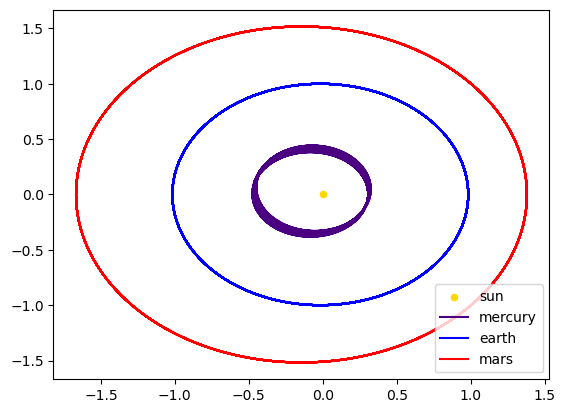

In [89]:
x_mer,y_mer = zip(*pos_mer)
x_e,y_e = zip(*pos_e)
x_m,y_m = zip(*pos_m)
x_j,y_j = zip(*pos_j)
#x_n,y_n = zip(*pos_n)

fig, ax = plt.subplots()
ax.scatter(0,0,s=20,color='gold',label='sun')
ax.plot(x_mer,y_mer,color='indigo',label='mercury')
ax.plot(x_e,y_e,color='blue',label='earth')
ax.plot(x_m,y_m,color='red',label='mars')
#ax.plot(x_j,y_j,color='moccasin',label='jupiter')
#ax.plot(x_n,y_n,color='grey')
plt.legend()
plt.savefig("planet.jpg")
plt.show()

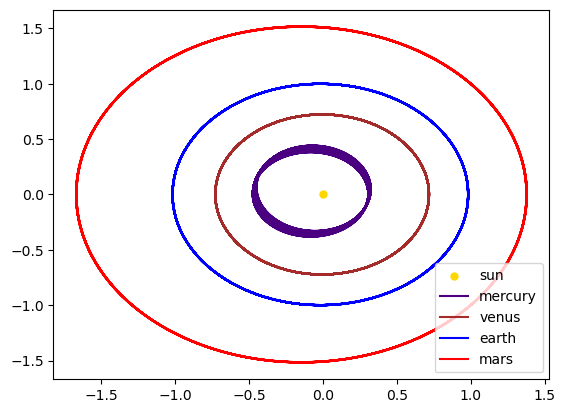

In [91]:
plt.figure()
for i in range(P-2):
    if i == 0:
        plt.scatter(0,0, color=colors[i], s=25,label=names[i])
    else:
        xs = all_pos[:, i, 0]
        ys = all_pos[:, i, 1]
        plt.plot(xs, ys, label=names[i], color=colors[i])
        
plt.legend()
plt.savefig("planet_new.jpg")
plt.show()